# HW 2 BCH394P
## Jacob Stambaugh, JS88749
02/25/21 | Due: 03/09/21

# Problem 1: Hidden Markov Model for finding transmembrane protein sequences
Proteins in a cell are often synthesized by a ribosome at one location in a cell (for example, in the
cytosol or attached to the endoplasmic reticulum), then shipped someplace else in the cell where the
proteins actually do their work. About a fourth to a third of the proteins get attached to membranes,
often with a portion of the protein on one side of a membrane, a portion penetrating the membrane, and
a portion on the other side of the membrane:

( pic 1)

In this problem, we’ll train a hidden Markov model to detect the regions of these so-called “integral
membrane proteins” that end up buried in the membrane. The reason we can do this is because the
amino acids in these regions tend to be much greasier in character than the amino acids in the nonmembrane-associated part of the protein.
We’ll construct a very simple hidden Markov model of the following architecture:

(pic2)

## Part 1, Problem 1
Calculate the frequencies of amino acids in the first two files (remember your programs from the first
problem set?). Use these frequencies to generate the emission probability tables of the S and T states of
the HMM.

In [1]:
# From Before: find freq of each base
def calc_freq_single(txt):
    # Define dictionary
    aa_emission={}
    le=0
    
    # Loop through each line in text file 
    for line in txt.readlines():
        line=line.strip('\r \n')
        # loop through each line to update dict nucleotides
        for ammino in line:
            le+=1
            if aa_emission.get(ammino)!=None:
                aa_emission.update({ammino:aa_emission.get(ammino)+1})
            else:
                aa_emission.update({ammino:1})
                
    for i in aa_emission.keys():
        aa_emission.update({i:aa_emission.get(i)/le})
    
    return aa_emission


In [2]:
# Calc frequencies - Transmembrane
trans_mem = open('transmembrane_sequences.txt')
transmem_freq=calc_freq_single(trans_mem)

# Display Results
print('Emission probabilities for Transmembrane protiens:')
for i in transmem_freq.keys():
    print('Ammino Acid:',i,'and it''s probability',round(transmem_freq.get(i),4))

Emission probabilities for Transmembrane protiens:
Ammino Acid: W and its probability 0.0226
Ammino Acid: L and its probability 0.158
Ammino Acid: N and its probability 0.0209
Ammino Acid: M and its probability 0.0316
Ammino Acid: V and its probability 0.0982
Ammino Acid: C and its probability 0.0265
Ammino Acid: G and its probability 0.0763
Ammino Acid: P and its probability 0.0288
Ammino Acid: I and its probability 0.1288
Ammino Acid: Y and its probability 0.0414
Ammino Acid: F and its probability 0.1072
Ammino Acid: A and its probability 0.0837
Ammino Acid: S and its probability 0.068
Ammino Acid: T and its probability 0.0523
Ammino Acid: R and its probability 0.0059
Ammino Acid: Q and its probability 0.0139
Ammino Acid: H and its probability 0.0077
Ammino Acid: E and its probability 0.0095
Ammino Acid: D and its probability 0.0091
Ammino Acid: K and its probability 0.0092


In [3]:
# Calc frequencies - soluble
soluble = open('soluble_sequences.txt')
soluble_freq=calc_freq_single(soluble)

# Display Results
print('Emission probabilities for Soluble protiens:')
for i in soluble_freq.keys():
    print('Ammino Acid:',i,'and it''s probability',round(soluble_freq.get(i),4))

Emission probabilities for Soluble protiens:
Ammino Acid: M and its probability 0.0213
Ammino Acid: P and its probability 0.0433
Ammino Acid: T and its probability 0.0614
Ammino Acid: S and its probability 0.0956
Ammino Acid: G and its probability 0.0512
Ammino Acid: I and its probability 0.0586
Ammino Acid: E and its probability 0.0634
Ammino Acid: L and its probability 0.0889
Ammino Acid: D and its probability 0.0581
Ammino Acid: Q and its probability 0.0371
Ammino Acid: F and its probability 0.0465
Ammino Acid: K and its probability 0.0715
Ammino Acid: A and its probability 0.0536
Ammino Acid: V and its probability 0.0526
Ammino Acid: N and its probability 0.0594
Ammino Acid: R and its probability 0.05
Ammino Acid: H and its probability 0.0227
Ammino Acid: W and its probability 0.0137
Ammino Acid: Y and its probability 0.0392
Ammino Acid: C and its probability 0.0121


## Part 2, Problem 1
Calculate the frequencies of beginning a sequence in each of the 2 states in the third file. Use these to
calculate the transition probabilities from the beginning state of the HMM.

In [4]:
# Part 2: Calculate freq of beginning in each state

# load data
state_dict={'S':0,'T':0}
state_seq = open('state_sequences.txt')

num_line=0

# loop and count S&T's in the begining of each line
for line in state_seq.readlines():
    line=line.strip('\r\n')
    state_dict.update({line[0]:state_dict.get(line[0])+1})
    num_line+=1
    
# Divide dict by length to find probability
for key in state_dict.keys():
    state_dict.update({key:state_dict.get(key)/num_line})

In [5]:
# Print Results
for key in state_dict.keys():
    print('Domain %s occurs at the beginning of read %.3f %% of the time!'%(key,state_dict.get(key)*100))

Domain S occurs at the beginning of read 98.536 % of the time!
Domain T occurs at the beginning of read 1.464 % of the time!


## Part 3, Problem 1
Calculate the number of occurrences of each digram in the state file. (e.g., SS or TT or ST or TS. A
digram is a 2 character string. In general, a string of n characters is an n-gram.) You can use your other
program from problem set#1 for this. From the numbers of observations, you should be able to
construct the transition probability matrix for the HMM.

In [6]:
# From Before: Calc frequencies function

def calc_freq(txt):
    # Define dict for di-nucleotides
    difreq_dict={}
    prev_base=-1
    
    # Loop through each line in text file
    for line in txt.readlines():
        # SKip emtpy lines
        if not line.strip():
            continue
        # get new line
        line=line.strip('\r\n')
        
        # loop through each line to count dinucleotides
        for i in range(0,len(line)-1):
                
            base=line[i:i+2]# gets di-pair
            
            # update dictionary
            if difreq_dict.get(base)!=None:
                difreq_dict.update({base:difreq_dict.get(base)+1})
            else:
                # add new pair
                difreq_dict.update({base:1})
               
            # attach(save) last base pair to new line
            #if i == len(line)-2:
                #prev_base=line[len(line)-1]
                    
    # divide by total length
    le=0
    for i in difreq_dict.keys():
        le+=difreq_dict.get(i)
  
    for i in difreq_dict.keys():
        difreq_dict.update({i:difreq_dict.get(i)})
        
    return difreq_dict

In [7]:
# Part 3: Calculate freq of each digram
import numpy as np

# load data
state_seq = open('state_sequences.txt')

# get freq 
state_seq=calc_freq(state_seq)

# transform into transistion probs
transistion_matrix=np.empty([2,2])

s_state_total=state_seq.get('SS')+state_seq.get('ST')
t_state_total=state_seq.get('TT')+state_seq.get('TS')

# add to matrix: SS,ST,TT,TS
transistion_matrix[0,0]=(state_seq.get('SS')/s_state_total)
transistion_matrix[0,1]=(state_seq.get('ST')/s_state_total)
transistion_matrix[1,0]=(state_seq.get('TS')/t_state_total)
transistion_matrix[1,1]=(state_seq.get('TT')/t_state_total)

# Check matrix
transistion_matrix

array([[0.98721407, 0.01278593],
       [0.04733914, 0.95266086]])

## Part 4, Problem 1
Now, take the amino acid sequence KNSFFFFFFFLIII and calculate the most likely state sequence
using the Viterbi algorithm.

In [92]:
# Part 4: Viterbi Algo

seq='KNSFFFFFFFLIII' # sequence of interest 

# put emission probs into list for east access
emission=[soluble_freq,transmem_freq]

# Intialize path matrix - will be a 2D list of dictionaries
path_mat=[{}] 


# get variables for start
b_s=state_dict.get('S')
b_t=state_dict.get('T')

# solve first column
path_mat[0][0]={"prob": b_s*soluble_freq.get(seq[0]) ,"prev": 'B'}
path_mat[0][1]={"prob": b_t*transmem_freq.get(seq[0]) ,"prev": 'B'}


# Iterate throguh and solve the rest

# outer loop - goes through input sequence
for aa in range(1,len(seq)):
    path_mat.append({})
    
    # inner loop - solves for both S + T states
    for state in range(0,2):
        
        # arb resetting
        max_tr_prob = path_mat[aa-1][0]["prob"] * transistion_matrix[1,state] # first state
        prev_st_selected = 0
        
        # inner inner loop - goes through every previous value
        for prev_state in range (0,2):
            
            # calculate prob for previous (only use prev*trans)
            tr_prob = path_mat[aa - 1][prev_state]["prob"] * transistion_matrix[prev_state][state]
            
            # save max prob + state 
            if tr_prob > max_tr_prob:
                max_tr_prob = tr_prob
                prev_st_selected = prev_state
            
        
        # Get best prob (now mult by emission)
        max_prob = max_tr_prob * emission[state][seq[aa]]
        
        # and update matrix
        path_mat[aa][state]= {"prob": max_prob ,"prev":prev_st_selected }
        #path_mat[state,aa]=sum(temp_list) <- foward algo implementation 


In [93]:
# back track to get Best path from path matrix

# intialize
best_path = []
max_prob = 0
best_st = None

# Get most probable end state 
if path_mat[-1].get(1).get('prob')>path_mat[-1].get(0).get('prob'):
    end=1
    best_path.append(end)
    max_prob+=path_mat[-1].get(1).get('prob')
else:
    end=0
    best_path.append(end)
    max_prob+=path_mat[-1].get(0).get('prob')

# Follow the backtrack from best end state till the first observation
for t in range(len(path_mat) - 2, -1, -1):
    best_path.insert(0, path_mat[t + 1][end]["prev"])
    end = path_mat[t + 1][end]["prev"]
    
# Convert to string (0=S,1=T)
best_st_let=[]
for i in best_path:
    if i ==0:
        best_st_let.append('S')
    else:
        best_st_let.append('T')

# Display reuslts
print ("The steps of states are| " + " ".join(best_st_let) + " |with highest probability of %s" % max_prob)


The steps of states are| S S S T T T T T T T T T T T |with highest probability of 1.2574396397520868e-14


## Wrapping Up Problem 1
Turn in the transition probability matrix, emission probability matrix, the Viterbi matrix, and the most
likely state sequence.

### ANSWER:
The Viterbi matrix matrix is dispalyed below, each dictionary reprsents 1 step in the sequence and each value in the dictionary represents a state (0 or 1). The emission and transistion matrices can be found above! (Didn't want to print long matrix again)

In [94]:
# Displaying Answer
path_mat

[{0: {'prob': 0.07044166911626344, 'prev': 'B'},
  1: {'prob': 0.0001348121134452175, 'prev': 'B'}},
 {0: {'prob': 0.004130000841423775, 'prev': 0},
  1: {'prob': 0.0014044056749113654, 'prev': 0}},
 {0: {'prob': 0.00038968559953049705, 'prev': 0},
  1: {'prob': 0.00026739597386537964, 'prev': 0}},
 {0: {'prob': 1.7888998295350752e-05, 'prev': 0},
  1: {'prob': 3.981149460588057e-05, 'prev': 0}},
 {0: {'prob': 8.212165407103207e-07, 'prev': 0},
  1: {'prob': 4.067266290218708e-06, 'prev': 1}},
 {0: {'prob': 3.769895863378206e-08, 'prev': 0},
  1: {'prob': 4.1552459256593515e-07, 'prev': 1}},
 {0: {'prob': 1.7306172143614127e-09, 'prev': 0},
  1: {'prob': 4.245128661536493e-08, 'prev': 1}},
 {0: {'prob': 9.344833878948295e-11, 'prev': 1},
  1: {'prob': 4.336955664095631e-09, 'prev': 1}},
 {0: {'prob': 9.546973355259555e-12, 'prev': 1},
  1: {'prob': 4.4307689900553754e-10, 'prev': 1}},
 {0: {'prob': 9.753485340318714e-13, 'prev': 1},
  1: {'prob': 4.526611605869404e-11, 'prev': 1}},
 {0

# Problem 2
How many transmembrane amino acid segments (i.e., segments of all T’s) does the average integral
membrane protein have? Show your calculation.

In [11]:
# Problem 2 Code:

# load data
state_seq = open('state_sequences.txt')

# Intialize variables
counts=[]
num_protiens=0

c=0
len_protien=[]

# Loop through and Count T's for each protien (line seperated)
for line in state_seq.readlines():
    # count total number of protiens
    num_protiens+=1
    
    # Clean Line
    line=line.strip('\r\n')
    # Loop throughl line + count T's
    temp_count=0
    for state in line:
        c+=1
        if state=='T':
            temp_count+=1
    # After iteration save data
    counts.append(temp_count)
    len_protien.append(c)

# Display result 
A=sum(counts)/num_protiens
B=sum(len_protien)/num_protiens
C=A/B
print('The average number of Transmembrane segments of an intergral protien is %.4f\nThe average length of a transmembrane \
protien is %.4f segments.\nThe ratio of the two is %.4F giving the percent composistion'%(A,B,C))

The average number of Transmembrane segments of an intergral protien is 100.0327
The average length of a transmembrane protien is 221438.9200 segments.
The ratio of the two is 0.0005 giving the percent composistion


### Problem 2 Answer

By looping through and counting all the T (transmembrane) sections for each intergral protien we can get the average number, which was found to be ~100!

# Problem 3
Draw a reasonable alternate architecture for the transmembrane sequence predicting HMM. Write
why you might prefer one of the two HMM architectures over the other.

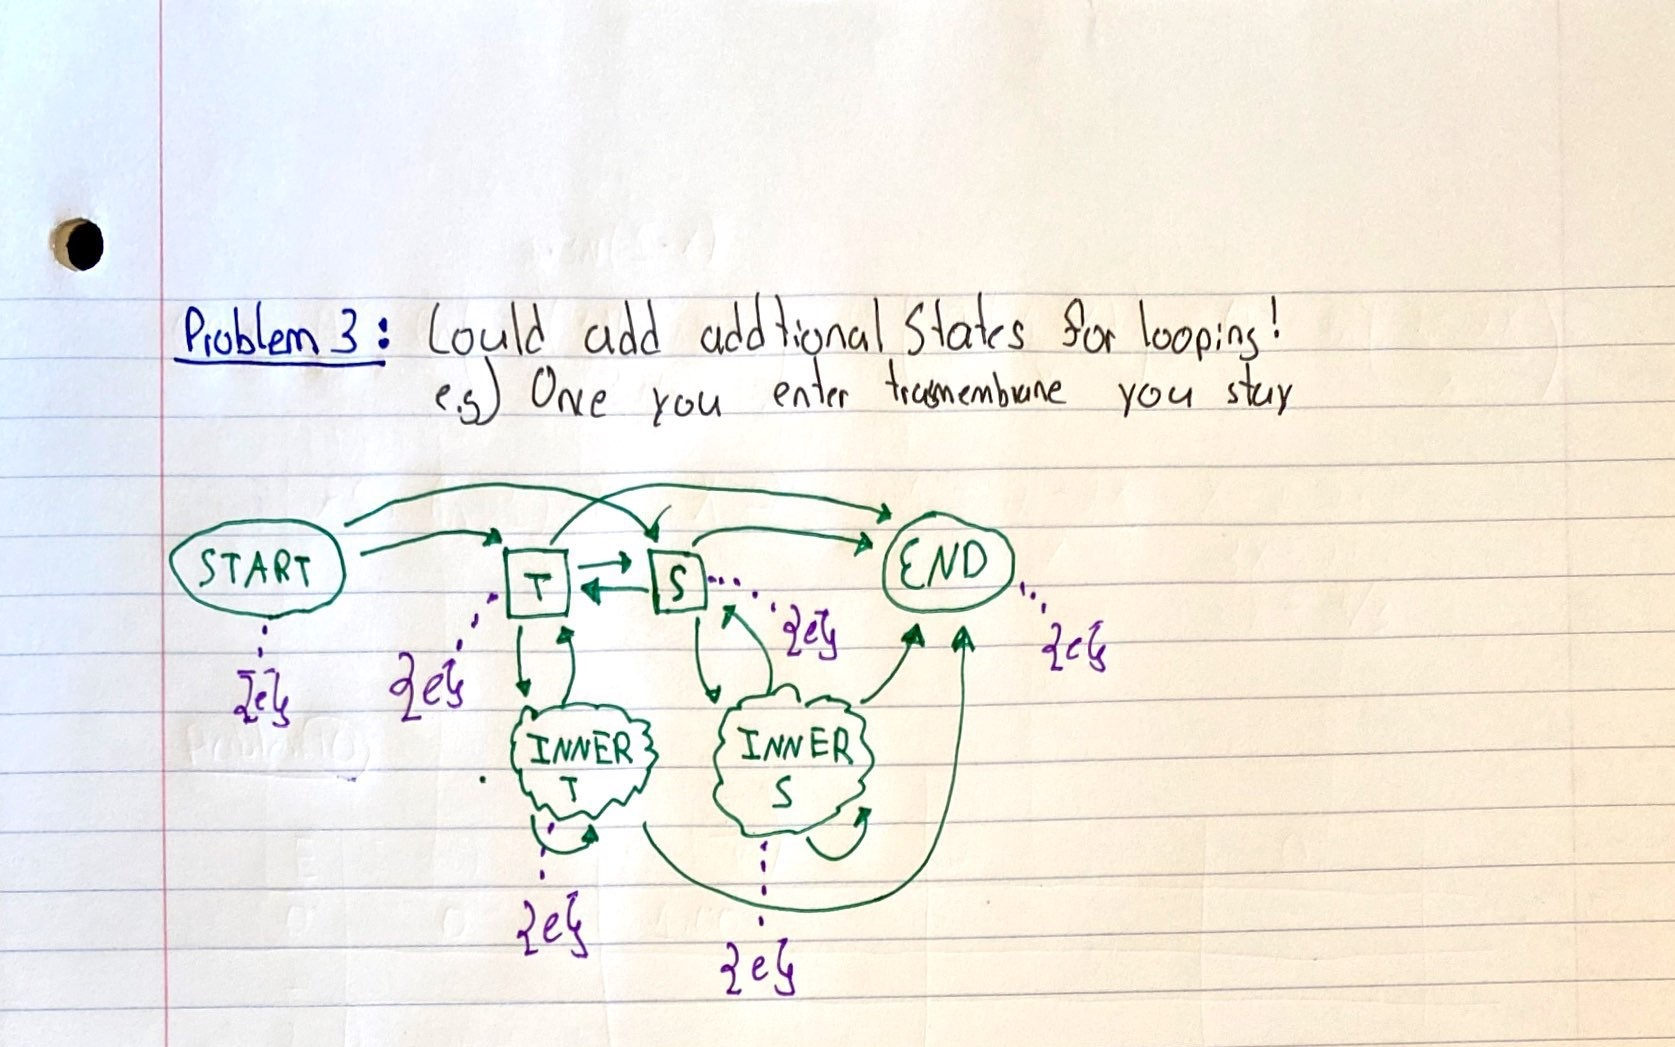

In [1]:
from IPython.display import Image
Image(filename='problem3.jpg') 

### Problem 3 Answer

We can edit the model to include intermediate states, that account for looping! THis modle may help to better capture spanning segments of either state. It helps improve the model slightly since it introduces addtional factors (e.g spanning segements).

# Problem 4
Draw a reasonable architecture for an HMM that would identify protein secondary structures (e.g.,
alpha helix, beta strand, random coil) within protein sequences.

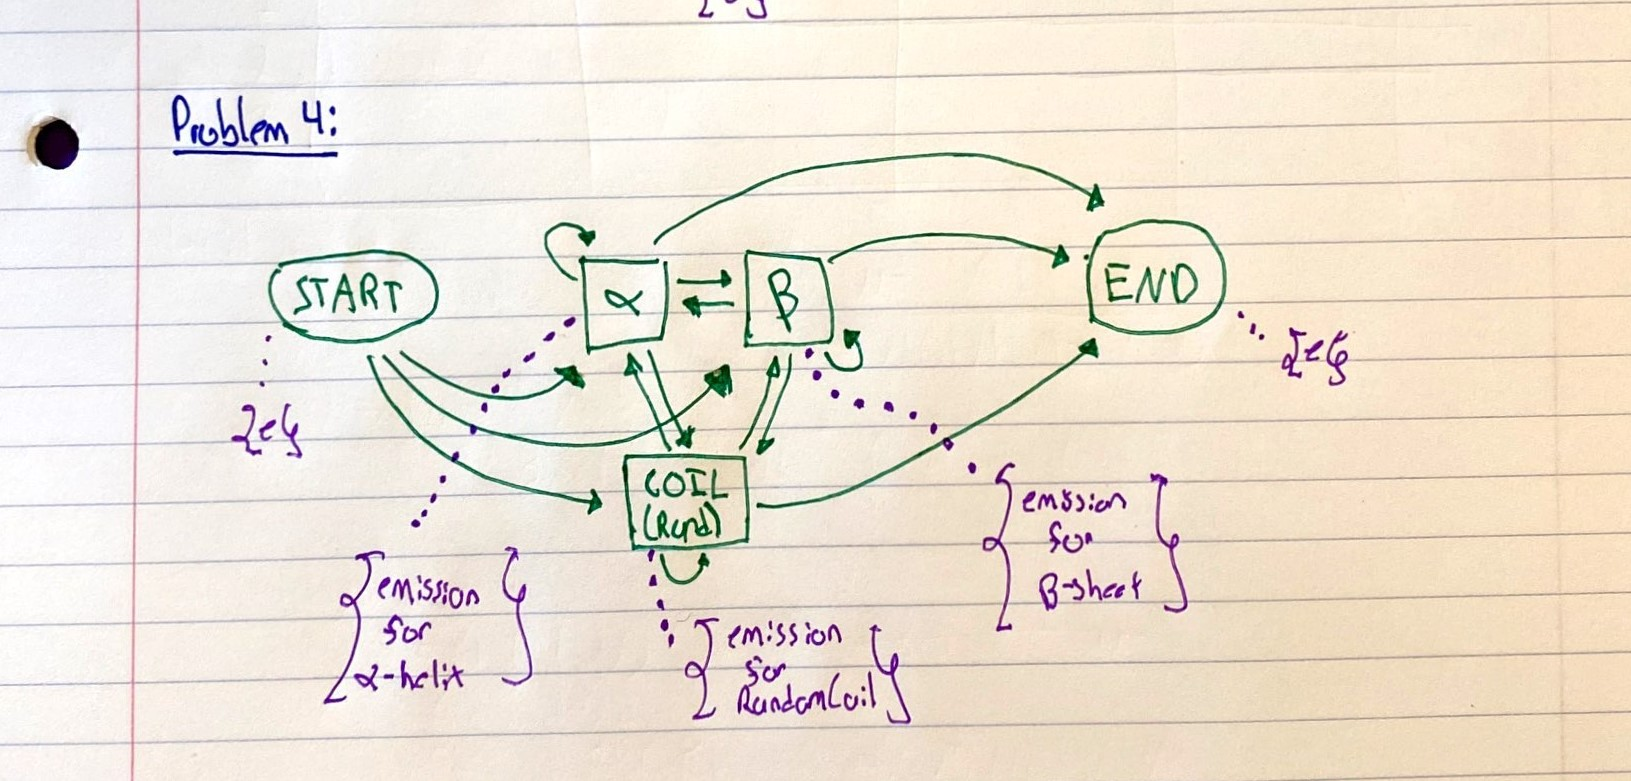

In [2]:
Image(filename='problem4.jpg') 

### Problem 4 Answer

We can use a simialar model structure as the soluable/transmembrane HMM but we need to add an addtional state for random coils!

# Problem 5
Suggest an application (ANY application!) of HMM’s to a biological problem other than the
applications we have discussed (i.e., not gene finding, CpG islands, protein secondary structure or
transmembrane segment prediction, sequence alignment). Draw a potential HMM architecture that
could be applied to that problem.

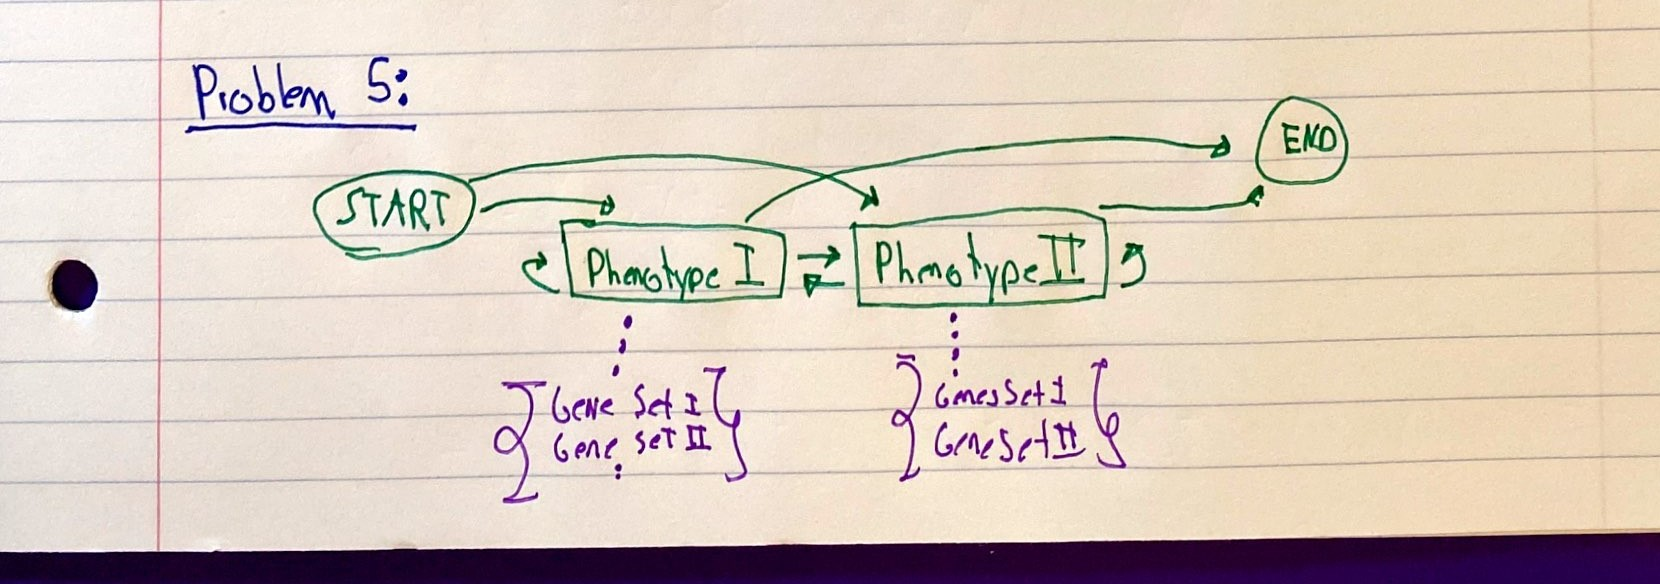

In [3]:
Image(filename='problem5.jpg') 

### Problem 5 Answer
An intersting idea for an HMM model would be one that can determine which phenotype a cells from a population came from. In this case, the observable event (emission probabilities) would be a set of genes that are enriched in that cell. This could help determine the number/percertage of phenptypes within a cancer population.

A better idea would to use this on a tumor sample to determine spatial phenotypes?

*Not actually sure if this makes sense 